In [18]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def iterate_map(f, x_0, n):
    trajectory = np.zeros(n + 1)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

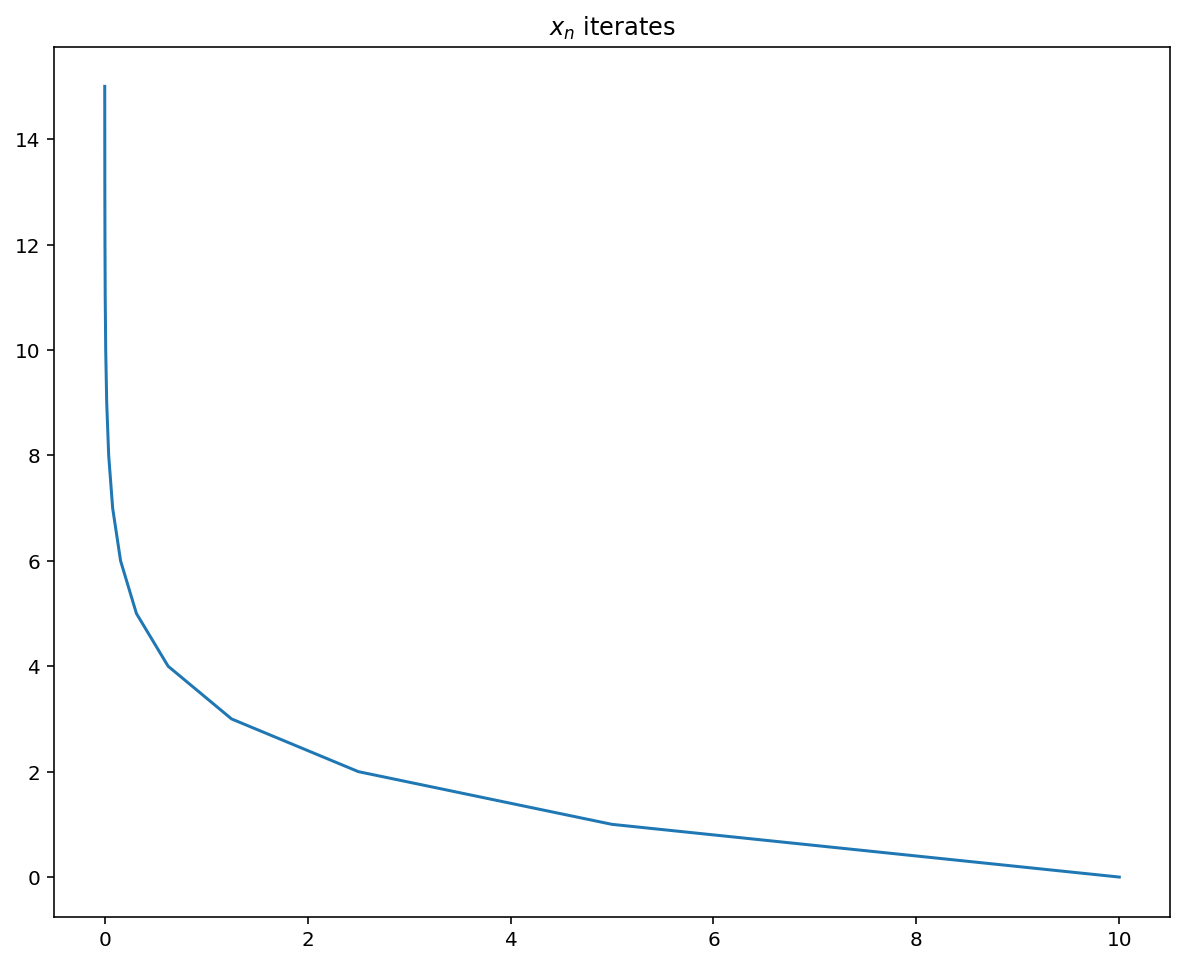

In [19]:
def problem_1_normal():
    half_map = lambda x: x / 2
    trajectory = iterate_map(half_map, 10, 15)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(trajectory, np.arange(16))

    ax.set_title(r'$x_n$ iterates')
    fig.show()

problem_1_normal()

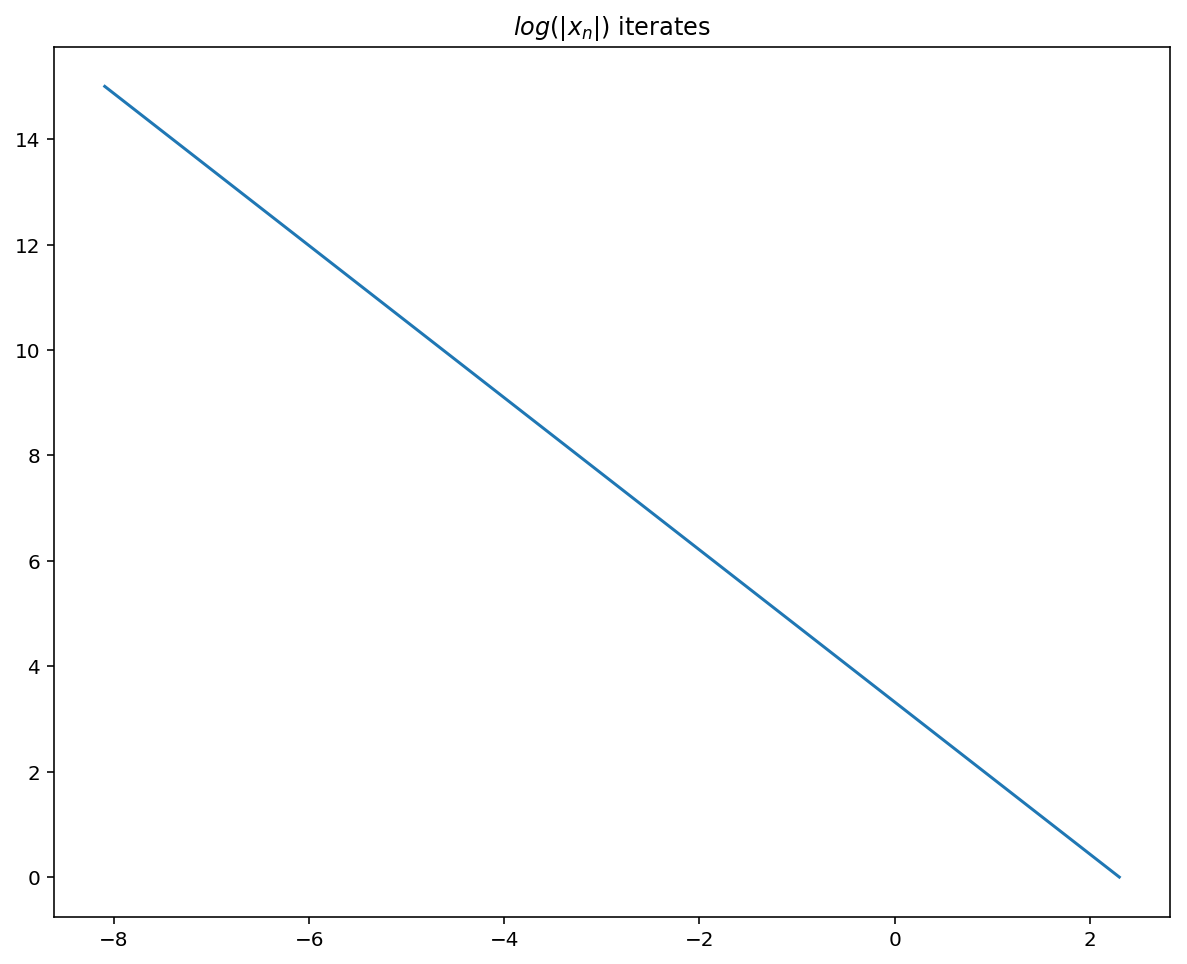

In [20]:
def problem_1_log():
    half_map = lambda x: x / 2
    trajectory = iterate_map(half_map, 10, 15)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(np.log(trajectory), np.arange(16))
    ax.set_title(r'$log(|x_n|)$ iterates')
    fig.show()

problem_1_log()

In [22]:
f = lambda x: x * (0.5 + x)

def f_deriv(x):
    return 0.5 + 2 * x

def lyapunov_exponent(fn, deriv, val, num_iterates=10**6):
    trajectory = iterate_map(fn, val, num_iterates)
    return np.sum(np.log(np.abs(deriv(trajectory)))) / trajectory.size

print(lyapunov_exponent(f, f_deriv, 1/4))
print(lyapunov_exponent(f, f_deriv, 3/8))
print(lyapunov_exponent(f, f_deriv, 31/64))

-0.693144851889931
-0.6931428224018508
-0.6931370755576622


In [23]:
def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def plot_fns(fns, ax=None, start=0, end=1, step=0.001):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    for fn in fns:
        fn_plot = get_plot(fn, start, end, step)
        ax.plot(fn_plot[:,0], fn_plot[:,1])

    plt.show()

identity_fn = lambda x: x

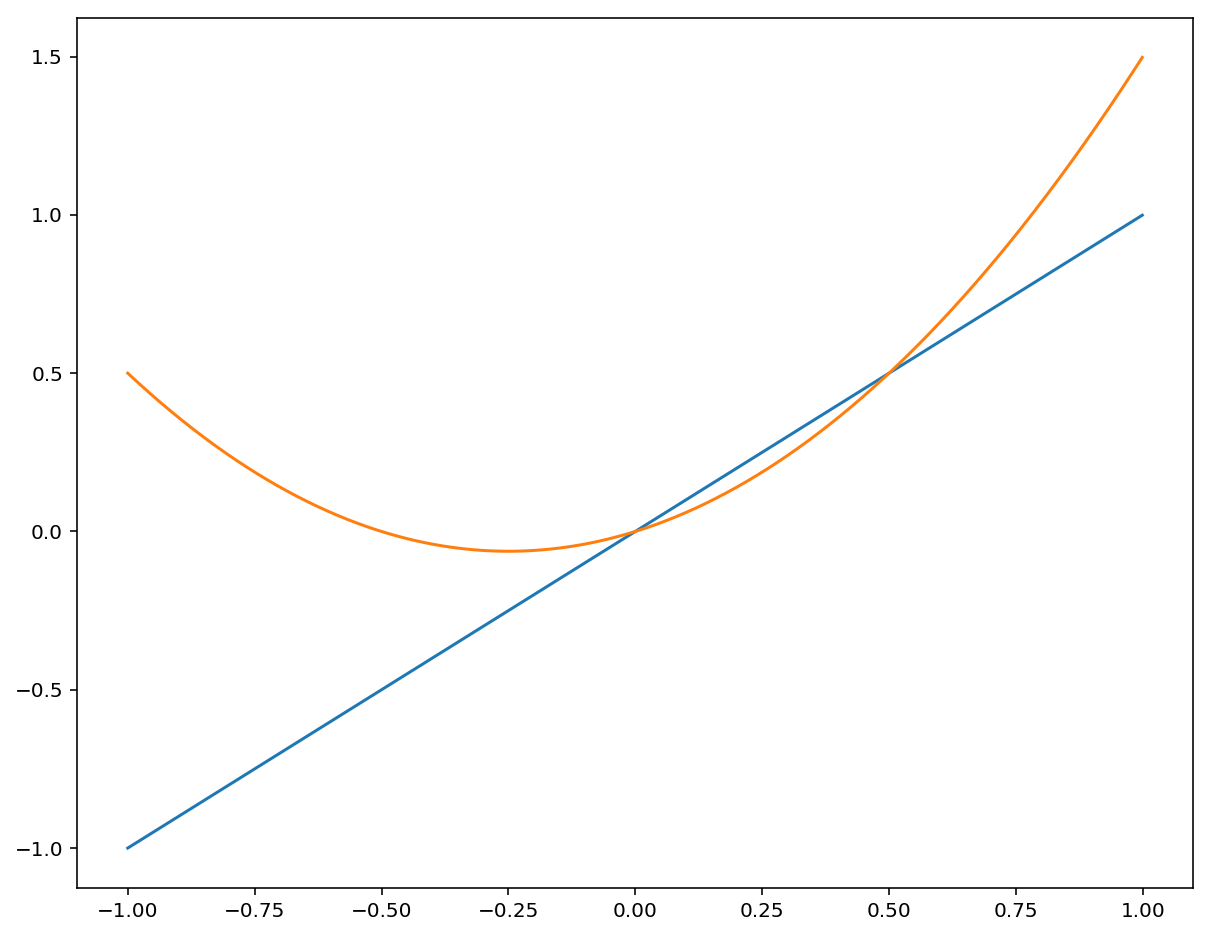

In [24]:
plot_fns([identity_fn, f], start=-1)

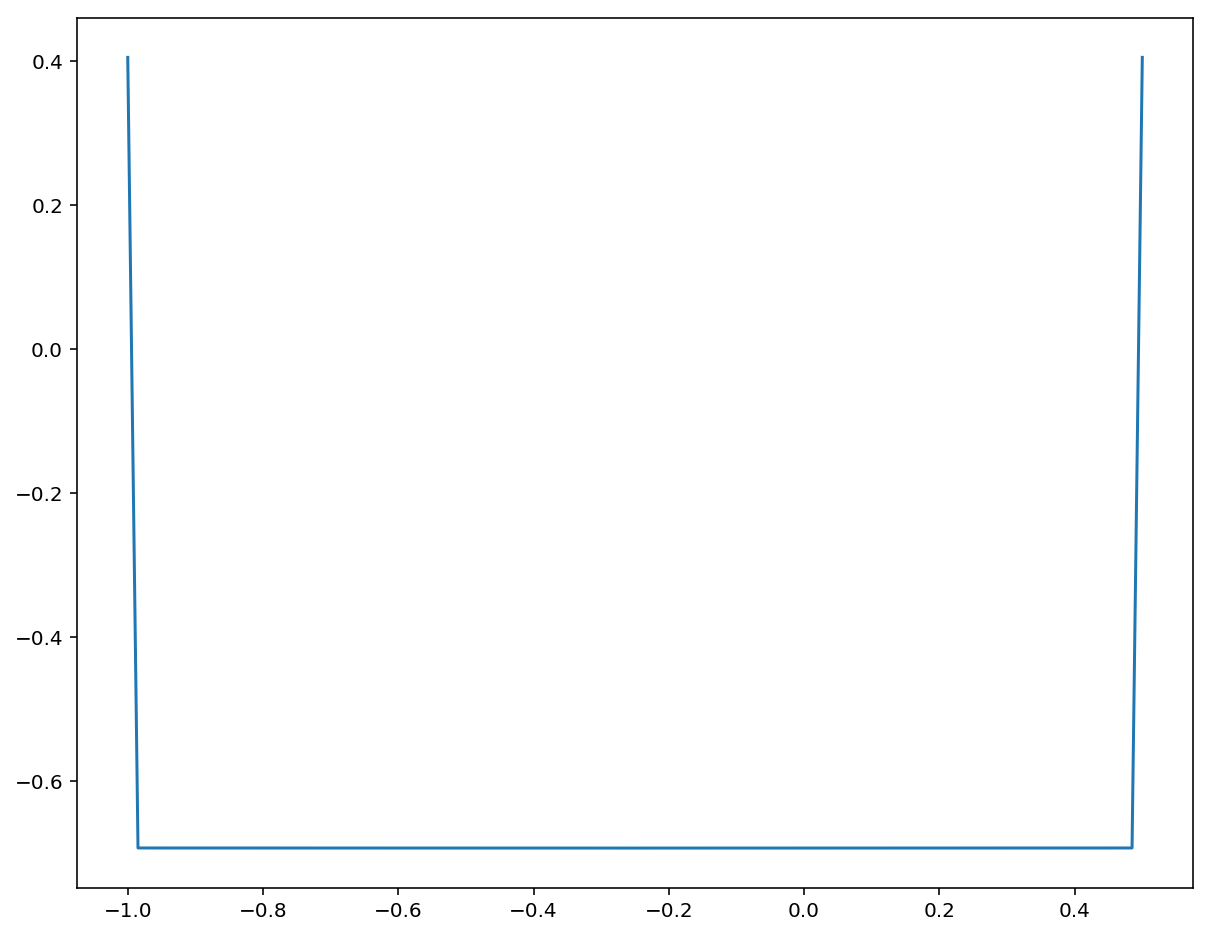

In [11]:
def problem_5():
    interval = np.linspace(-1, 0.5, 100)
    fig, ax = plt.subplots(figsize=(10, 8))

    all_exponents = [lyapunov_exponent(f, f_deriv, x_i, 10**5) for x_i in interval]
    ax.plot(interval, all_exponents)
    fig.show()

problem_5()

### 5.

The basin of attraction is $(-1, \frac{1}{2})$.

The graph of the Lyapunov exponents over this interval appears this way because of the sink at $x = 0$ and the fixed points at $-1$ and $\frac{1}{2}$. In the basin of attraction of the sink $x = 0$, the Lyapunov exponent should be roughly the same. We know that the Lyapunov exponent can be decomponsed to the summation of the map derivatives evaluated at the trajectory of $x_0$. From this, we can see that for points within the basin of attraction of a sink will have convergent trajectories, and by this decomposition, their Lyapunov exponents will approximate one the Lyapunov exponent of the fixed point.

At the endpoints of the interval (which are not part of the basin of attraction), the Lyapunov exponents are very different because their trajectories do not converge into the sink at $0$ because they are fixed points. Additionally, they should have similar Lyapunov exponents because $f(-1) = \frac{1}{2}$.

1.1314021114910993
0.09531017980432509


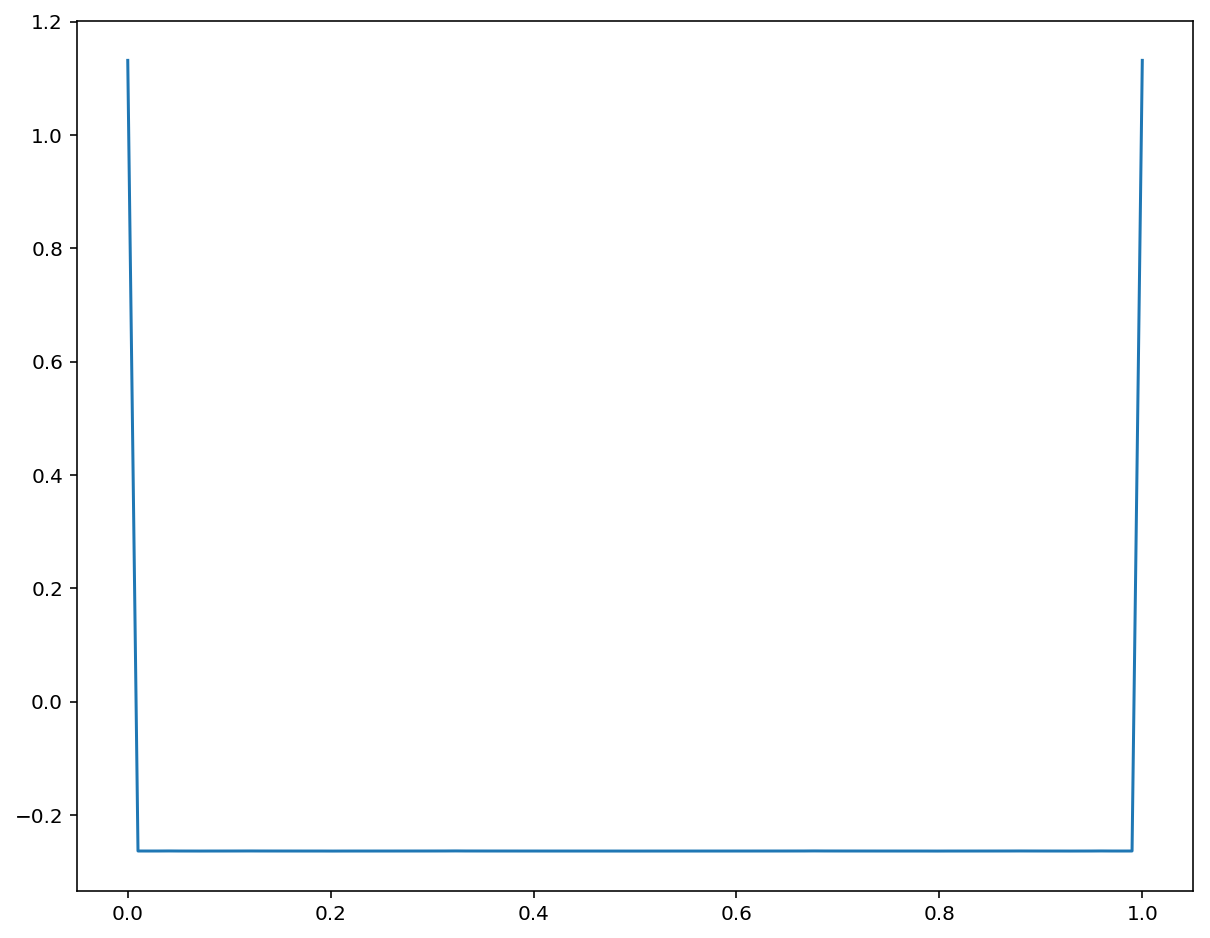

In [25]:
def problem_6():
    interval = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(10, 8))
    f1 = lambda x: 3.1 * (x - x**2)
    f1_deriv = lambda x: 3.1 - (6.2 * x)

    all_exponents = [lyapunov_exponent(f1, f1_deriv, x_i, 10**5) for x_i in interval]
    ax.plot(interval, all_exponents)
    fig.show()
    
    print(lyapunov_exponent(f1, f1_deriv, 0))
    print(lyapunov_exponent(f1, f1_deriv, (3.1 - 1) / 3.1))

problem_6()

/Users/michaelyang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


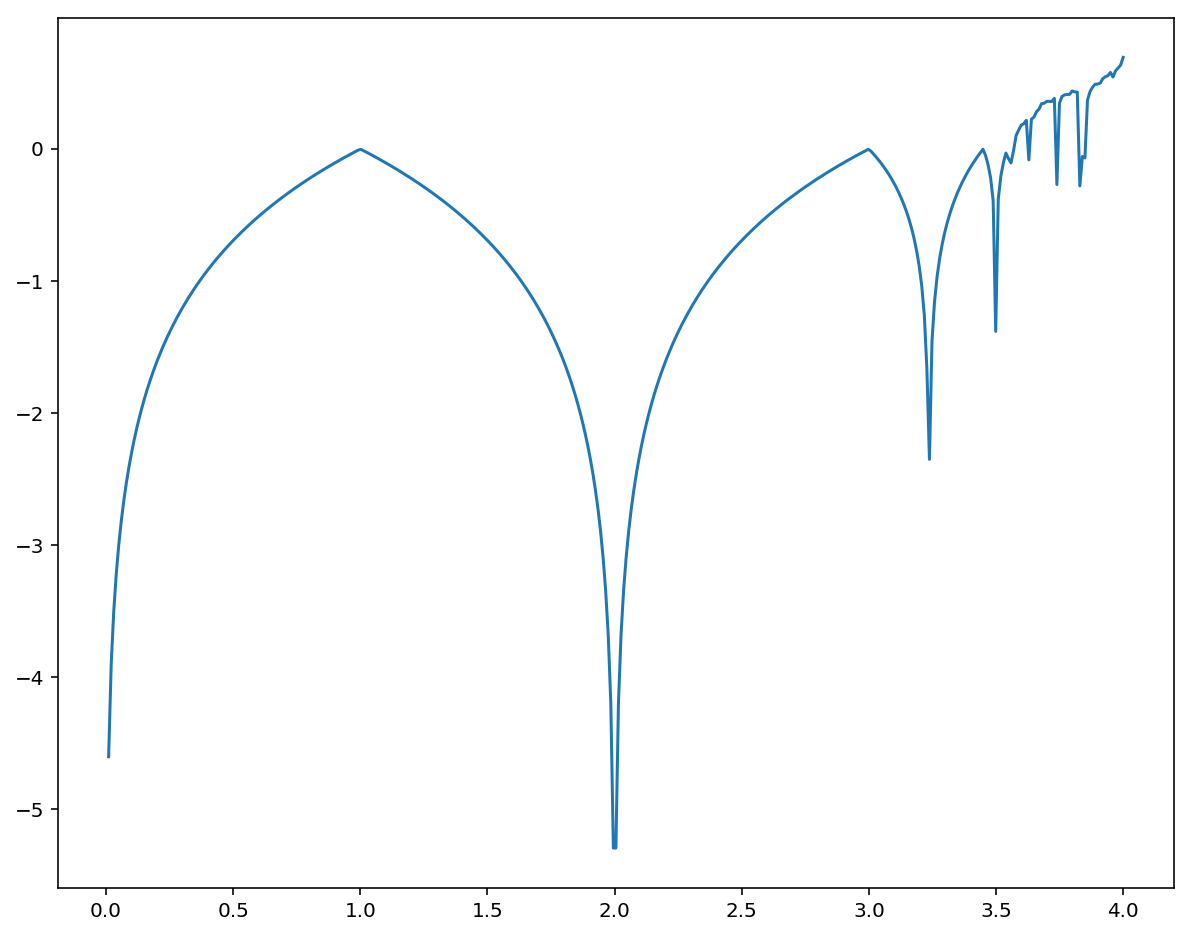

In [28]:
def problem_7():
    interval = np.linspace(0, 4, 400)
    fig, ax = plt.subplots(figsize=(10, 8))

    logistic_map = lambda a: lambda x: a * x * (1 - x)
    logistic_map_deriv = lambda a: lambda x: a - (2 * a * x)

    all_exponents = [lyapunov_exponent(logistic_map(a_i), logistic_map_deriv(a_i), 0.2, 10**4) 
                     for a_i in interval]
    ax.plot(interval, all_exponents)
    fig.show()

problem_7()

In [14]:
(3.1 - 1) / 3.1

0.6774193548387097